In [1]:
%run ~/pizza/src/pizza.py

Pizza.py (9 Oct 2015), a toolkit written in Python
type ? for help, CTRL-D to quit
Loading tools ...
animate tool did not load:
  No module named ImageTk
image tool did not load:
  No module named Pmw
gl tool did not load:
  No module named OpenGL.Tk


In [2]:
from pylab import *

In [3]:
data = dump("dump.lammpstrj")

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 2

In [5]:
t = data.time(); nt = size(t); tmp_time, box, atoms, bonds, tris, lines = data.viz(0)

In [6]:
%matplotlib inline

# Distribution of velocity at time steps $t_i$

We see that the velocity distribution of the particles evolves towards as Maxwell-Boltzmann distribution:

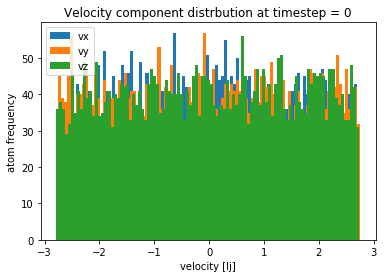

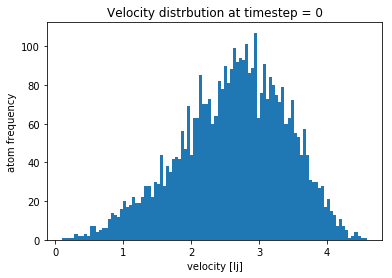

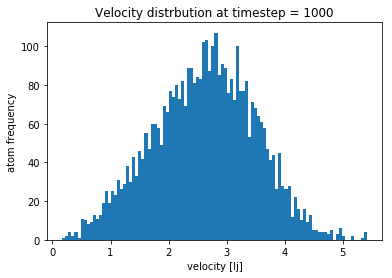

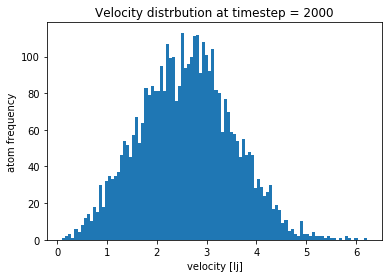

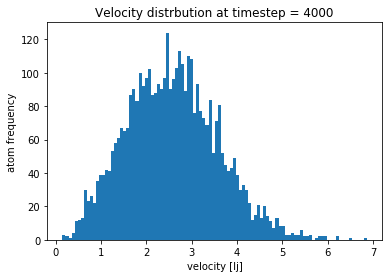

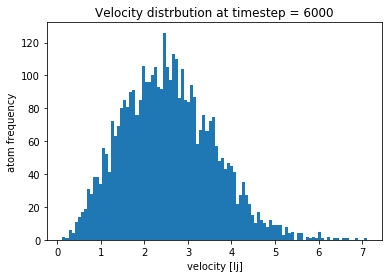

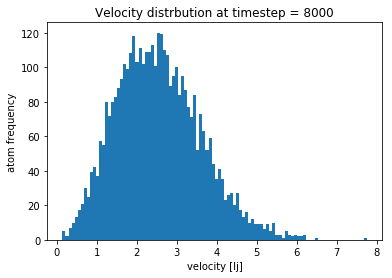

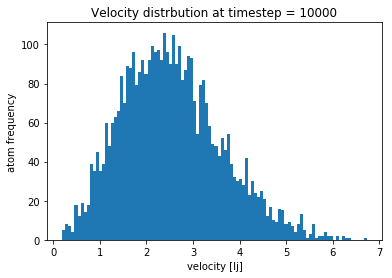

In [7]:
def velocity_compute(data, ti):
    vx = array(data.vecs(t[ti], "vx"))
    vy = array(data.vecs(t[ti], "vy"))
    vz = array(data.vecs(t[ti], "vz"))
    return sqrt(vx**2 + vy**2 + vz**2)


tis = [0, 100, 200, 400, 600, 800, 1000]
bin_size = 100

vx = array(data.vecs(t[0], "vx"))
vy = array(data.vecs(t[0], "vy"))
vz = array(data.vecs(t[0], "vz"))
title("Velocity component distrbution at timestep = {}".format(t[0]))
xlabel("velocity [lj]")
ylabel("atom frequency")

hist(vx, bins=bin_size, label="vx")
hist(vy, bins=bin_size, label="vy")
hist(vz, bins=bin_size, label="vz")
legend()
show()

velo = zeros((len(tis), len(vx)), dtype=float)

for i, ti in enumerate(tis):
    velo[i, :] = velocity_compute(data, ti)
    hist(velo[i, :], bins=bin_size)
    title("Velocity distrbution at timestep = {}".format(t[ti]))
    xlabel("velocity [lj]")
    ylabel("atom frequency")
    show()

In [8]:
bin_size=100
rmin, rmax = 0.0, 9.0

freq_n, values_n = histogram(velo[-1, :], bins=bin_size, range=(rmin, rmax))
freq_n2 = sum(freq_n**2)
char_hists = []

for i in range(len(t)):
    if i > 0:
        vpast = values
        
    velocity = velocity_compute(data, i)
    freq, values = histogram(velocity, bins=bin_size, range=(rmin, rmax))
    
    if i > 0:
        assert (vpast == values).all()

    char_hists.append(sum(freq * freq_n) / float(freq_n2))

In [9]:
print("At the begging:")
print(char_hists[:10])

print("At the end:")
print(char_hists[-10:])

At the begging:
[1.0821885350187237, 1.0821885350187237, 1.0821885350187237, 1.0821885350187237, 1.0821885350187237, 1.0821885350187237, 1.0821885350187237, 1.0821885350187237, 1.0821885350187237, 1.0821885350187237]
At the end:
[0.9982512529682341, 0.9986169703150836, 0.9993509804830559, 0.99918872560382, 0.9992041784494615, 0.9980606678719887, 0.9971824311446953, 0.9987611968744045, 0.9979576489010451, 1.0]


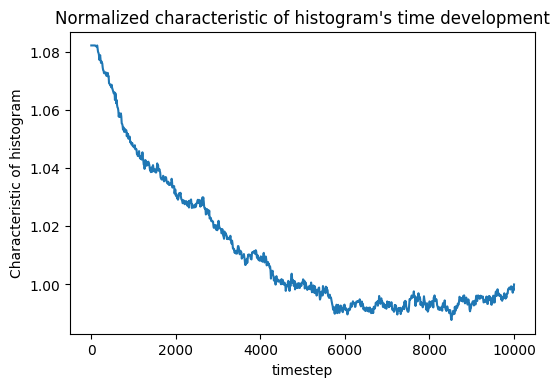

In [9]:
plot(t, char_hists)
title("Normalized characteristic of histogram's time development")
xlabel("timestep")
ylabel("Characteristic of histogram")
show()

# Energy

In [10]:
energies = 0.5 * 1.0 * velo**2

In [11]:
for i, energy in enumerate(energies):
    print("Timestep = {}, Ke = {}".format(t[tis[i]], sum(energy)))

Timestep = 0, Ke = 14996.2503865
Timestep = 1000, Ke = 15220.7441037
Timestep = 2000, Ke = 15216.2131517
Timestep = 4000, Ke = 15218.778094
Timestep = 6000, Ke = 15225.0944975
Timestep = 8000, Ke = 15217.8693624
Timestep = 10000, Ke = 15209.5723597


In [12]:
def distance_compute(data, ti):
    x = array(data.vecs(t[ti], "x"))
    y = array(data.vecs(t[ti], "y"))
    z = array(data.vecs(t[ti], "z"))
    
    r = zeros((len(x), 3), dtype=float)
    delta_x = x[:, newaxis] - x[newaxis, :]
    delta_y = y[:, newaxis] - y[newaxis, :]
    delta_z = z[:, newaxis] - z[newaxis, :]
    
    delta_r = sqrt(delta_x**2 + delta_y**2 + delta_z**2)
    
    return triu(delta_r)

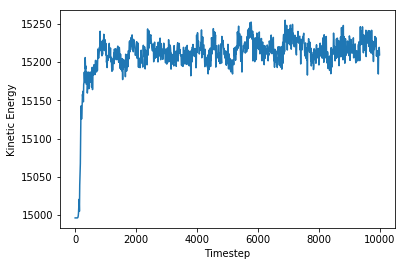

In [18]:
ke = zeros(len(t))

for i in range(len(t)):
    velocity = velocity_compute(data, i)
    ke[i] = sum(0.5 * 1.0 * velocity**2)
    
plot(t, ke)
xlabel("Timestep")
ylabel("Kinetic Energy")
show()

In [13]:
from numba import jit, prange

In [15]:
@jit(nopython=True, parallel=True)
def potential_compute(delta_r):
    """Distances delta_r must be a upper triangular matrix"""
    U = 0.0
    for i in prange(delta_r.shape[0]):
        for j in range(i+1, delta_r.shape[1]):
            U += 4 * ((1.0 / delta_r[i, j])**12 - (1.0 / delta_r[i, j])**6) # sigma = 1.0, epsilon = 1.0
    return U

In [16]:
potential_sum = zeros(len(t))

for i in range(len(t)):
    delta_r = distance_compute(data, i)
    print("Timestep: = {}".format(t[i]))
    potential_sum[i] = potential_compute(delta_r)

Timestep: = 0
Timestep: = 10
Timestep: = 20
Timestep: = 30
Timestep: = 40
Timestep: = 50
Timestep: = 60
Timestep: = 70
Timestep: = 80
Timestep: = 90
Timestep: = 100
Timestep: = 110
Timestep: = 120
Timestep: = 130
Timestep: = 140
Timestep: = 150
Timestep: = 160
Timestep: = 170
Timestep: = 180
Timestep: = 190
Timestep: = 200
Timestep: = 210
Timestep: = 220
Timestep: = 230
Timestep: = 240
Timestep: = 250
Timestep: = 260
Timestep: = 270
Timestep: = 280
Timestep: = 290
Timestep: = 300
Timestep: = 310
Timestep: = 320
Timestep: = 330
Timestep: = 340
Timestep: = 350
Timestep: = 360
Timestep: = 370
Timestep: = 380
Timestep: = 390
Timestep: = 400
Timestep: = 410
Timestep: = 420
Timestep: = 430
Timestep: = 440
Timestep: = 450
Timestep: = 460
Timestep: = 470
Timestep: = 480
Timestep: = 490
Timestep: = 500
Timestep: = 510
Timestep: = 520
Timestep: = 530
Timestep: = 540
Timestep: = 550
Timestep: = 560
Timestep: = 570
Timestep: = 580
Timestep: = 590
Timestep: = 600
Timestep: = 610
Timestep: = 620
Tim

Timestep: = 4890
Timestep: = 4900
Timestep: = 4910
Timestep: = 4920
Timestep: = 4930
Timestep: = 4940
Timestep: = 4950
Timestep: = 4960
Timestep: = 4970
Timestep: = 4980
Timestep: = 4990
Timestep: = 5000
Timestep: = 5010
Timestep: = 5020
Timestep: = 5030
Timestep: = 5040
Timestep: = 5050
Timestep: = 5060
Timestep: = 5070
Timestep: = 5080
Timestep: = 5090
Timestep: = 5100
Timestep: = 5110
Timestep: = 5120
Timestep: = 5130
Timestep: = 5140
Timestep: = 5150
Timestep: = 5160
Timestep: = 5170
Timestep: = 5180
Timestep: = 5190
Timestep: = 5200
Timestep: = 5210
Timestep: = 5220
Timestep: = 5230
Timestep: = 5240
Timestep: = 5250
Timestep: = 5260
Timestep: = 5270
Timestep: = 5280
Timestep: = 5290
Timestep: = 5300
Timestep: = 5310
Timestep: = 5320
Timestep: = 5330
Timestep: = 5340
Timestep: = 5350
Timestep: = 5360
Timestep: = 5370
Timestep: = 5380
Timestep: = 5390
Timestep: = 5400
Timestep: = 5410
Timestep: = 5420
Timestep: = 5430
Timestep: = 5440
Timestep: = 5450
Timestep: = 5460
Timestep: = 54

Timestep: = 9710
Timestep: = 9720
Timestep: = 9730
Timestep: = 9740
Timestep: = 9750
Timestep: = 9760
Timestep: = 9770
Timestep: = 9780
Timestep: = 9790
Timestep: = 9800
Timestep: = 9810
Timestep: = 9820
Timestep: = 9830
Timestep: = 9840
Timestep: = 9850
Timestep: = 9860
Timestep: = 9870
Timestep: = 9880
Timestep: = 9890
Timestep: = 9900
Timestep: = 9910
Timestep: = 9920
Timestep: = 9930
Timestep: = 9940
Timestep: = 9950
Timestep: = 9960
Timestep: = 9970
Timestep: = 9980
Timestep: = 9990
Timestep: = 10000


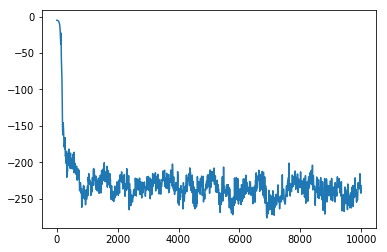

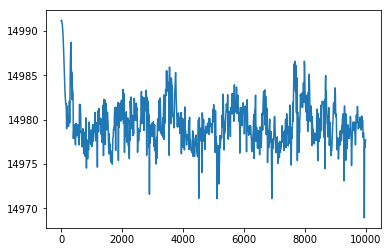

In [19]:
plot(t[:len(t)], potential_sum)
show()

plot(t[:len(t)], potential_sum + ke[:len(t)])